In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Mission 1. Netflix and Code 

In [73]:
netflix = pd.read_csv('./netflix_titles.csv')

netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


## Mandatory : 한국 작품은 얼마나 있는가?
  - country column을 기준으로 한다
  - "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

### 조건부 슬라이싱

In [6]:
netflix_korea = netflix[netflix['country'] == 'South Korea']

len(netflix_korea)

183

### Groupby 

In [18]:
netflix_count = netflix.groupby('country').count()['title']
netflix_count['South Korea']

183

## Bonus : 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
  - country column을 기준으로 한다
  - **단일 국가**인 경우를 기준으로 결과를 구해보자

### country 값이 존재하지 않는 작품 제거

In [83]:
netflix = netflix.dropna(subset=['country'])

### 단일 국가 작품만 추출

In [85]:
nf_country_split = netflix['country'].str.split()
single_country = netflix[nf_country_split.transform(len) == 1]
single_country

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7776,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,"November 1, 2018",2011,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp..."
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


###  국가별 작품 수를 title 기준으로 카운트하여 정렬

In [89]:
country_count = single_country.groupby('country')['title'].count().sort_values(ascending=False)
country_count

country
India        923
Japan        226
Canada       177
Spain        134
France       115
            ... 
Jordan         1
Croatia        1
Cyprus         1
Guatemala      1
Zimbabwe       1
Name: title, Length: 61, dtype: int64

### 작품이 가장 많은 국가 추출

In [90]:
country_count.head(1)

country
India    923
Name: title, dtype: int64

# Mission 2. 가즈아!

## Mandatory : 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프
  - 선의 색깔은 노란색(#f2a900) 으로 해야합니다.
  - x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
  - 이동평균의 기준은 Open Column으로 계산합니다.
  - 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [122]:
btc_df = pd.read_csv('./BitCoin.csv')
btc_df = btc_df.drop('Unnamed: 0', axis=1)
btc_df = btc_df.set_index('Date')
btc_df = btc_df.sort_index()
btc_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-01-05,139.00,139.89,107.72,116.99,8.026719e+06,1542820000
2013-01-06,128.81,129.78,127.20,129.30,7.521960e+06,1445800000
2013-01-07,97.51,97.66,86.30,88.05,5.759986e+06,1107130000
2013-01-08,106.21,108.00,103.01,104.00,6.348195e+06,1220190000
2013-01-09,135.14,145.81,134.81,138.34,8.179728e+06,1572230000
...,...,...,...,...,...,...
2017-12-05,1845.76,1856.15,1694.01,1724.24,7.409840e+08,30131100000
2017-12-06,2953.22,2997.26,2518.56,2659.63,2.569530e+09,48391200000
2017-12-07,2332.77,2423.71,2275.14,2398.84,1.117410e+09,38355900000


### 2016.6 ~ 2017.6 기간 추출
  - 16.06.01 기준으로 4일 전인 16.05.28까지 추출

In [128]:
btc_1606_1706 = btc_df['2016-05-28':'2017-06-30']
btc_1606_1706

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2016-05-28,473.03,533.47,472.70,530.04,1.811990e+08,7375780000
2016-05-29,527.48,553.96,512.18,526.23,1.487370e+08,8226500000
2016-05-30,528.47,544.35,522.96,533.86,8.795870e+07,8243960000
2016-05-31,534.19,546.62,520.66,531.39,1.384500e+08,8335100000
2016-06-01,431.86,431.86,426.34,429.11,3.404250e+07,6498830000
...,...,...,...,...,...,...
2017-06-26,2590.57,2615.25,2376.29,2478.45,1.663280e+09,42514000000
2017-06-27,2478.45,2552.45,2332.99,2552.45,1.489790e+09,40677900000
2017-06-28,2553.03,2603.98,2484.42,2574.79,1.183870e+09,41906700000


### rolling 을 통해 5일 간 평균을 계산
  - 5MA column으로 추출한 데이터프레임에 추가
  - 이후 필요 없는 부분인 16.05.28 ~ 16.05.31 까지의 데이터 삭제

In [136]:
btc_1606_1706['5MA'] = btc_1606_1706['Open'].rolling(5).mean()
btc_1606_1706 = btc_1606_1706.drop(['2016-05-28', '2016-05-29', '2016-05-30', '2016-05-31'])
btc_1606_1706

<ipython-input-136-4ba7bd1e2b3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_1606_1706['5MA'] = btc_1606_1706['Open'].rolling(5).mean()


,Open,High,Low,Close,Volume,Market Cap,5MA
Date,,,,,,,
2016-06-01,431.86,431.86,426.34,429.11,3.404250e+07,6498830000,499.006
2016-06-02,386.59,386.63,372.39,376.52,4.924930e+07,5865740000,481.718
2016-06-03,400.52,411.91,395.78,407.71,9.121250e+07,6121400000,456.326
2016-06-04,424.28,424.53,422.73,423.41,5.909100e+07,6533260000,435.488
2016-06-05,447.94,461.38,447.07,459.60,7.279680e+07,6947800000,418.238
...,...,...,...,...,...,...,...
2017-06-26,2590.57,2615.25,2376.29,2478.45,1.663280e+09,42514000000,2666.942
2017-06-27,2478.45,2552.45,2332.99,2552.45,1.489790e+09,40677900000,2624.426
2017-06-28,2553.03,2603.98,2484.42,2574.79,1.183870e+09,41906700000,2593.564


### Date의 자료형을 Datetime으로 변환

In [161]:
btc_1606_1706.index = pd.to_datetime(btc_1606_1706.index)

print(type(btc_1606_1706.index))
btc_1606_1706

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,Open,High,Low,Close,Volume,Market Cap,5MA
Date,,,,,,,
2016-06-01,431.86,431.86,426.34,429.11,3.404250e+07,6498830000,499.006
2016-06-02,386.59,386.63,372.39,376.52,4.924930e+07,5865740000,481.718
2016-06-03,400.52,411.91,395.78,407.71,9.121250e+07,6121400000,456.326
2016-06-04,424.28,424.53,422.73,423.41,5.909100e+07,6533260000,435.488
2016-06-05,447.94,461.38,447.07,459.60,7.279680e+07,6947800000,418.238
...,...,...,...,...,...,...,...
2017-06-26,2590.57,2615.25,2376.29,2478.45,1.663280e+09,42514000000,2666.942
2017-06-27,2478.45,2552.45,2332.99,2552.45,1.489790e+09,40677900000,2624.426
2017-06-28,2553.03,2603.98,2484.42,2574.79,1.183870e+09,41906700000,2593.564


### 그래프 그리기

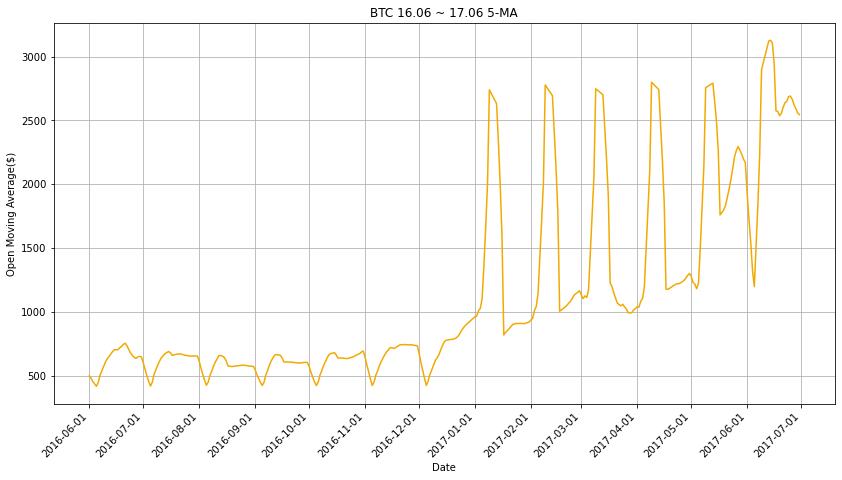

In [175]:
plt.figure(figsize=(14,7))

plt.plot(btc_1606_1706.index, btc_1606_1706['5MA'], color='#f2a900', label='BTC 5-MA')

plt.grid(True)

plt.title('BTC 16.06 ~ 17.06 5-MA')

plt.xticks(pd.date_range(start='2016-06-01', periods=14, freq=pd.offsets.MonthBegin()), rotation=45, ha='right')

plt.xlabel('Date')
plt.ylabel('Open Moving Average($)')

plt.show()

## Bonus : 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프
  - 선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다.
  - x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
  - 이동평균의 기준은 Open Column으로 계산합니다.
  - 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [179]:
eth_df = pd.read_csv('./ETH_day.csv')
eth_df = eth_df.set_index('Date')
eth_df = eth_df.sort_index()
eth_df = eth_df.drop('Symbol', axis=1)
eth_df

,Open,High,Low,Close,Volume ETH,Volume USD
Date,,,,,,
2016-05-09,12.00,12.00,9.36,9.98,1317.90,12885.06
2016-05-10,9.98,9.98,9.36,9.68,672.06,6578.20
2016-05-11,9.68,10.47,9.68,10.43,3052.51,30978.11
2016-05-12,10.43,12.00,9.92,10.20,2072.56,22183.39
2016-05-13,10.20,11.59,10.20,10.69,1769.71,18923.55
...,...,...,...,...,...,...
2020-04-11,158.26,161.49,154.25,158.66,13761.72,2172914.57
2020-04-12,158.66,165.37,155.21,158.56,12877.33,2082804.05
2020-04-13,158.56,159.51,150.12,156.97,15698.32,2416728.28


### 이더리움의 16.06 ~ 17.06 기간 데이터 추출
  - 16.06.01 기준으로 4일 전인 16.05.28까지 추출

In [182]:
eth_1606_1706 = eth_df['2016-05-28':'2017-06-30']
eth_1606_1706

,Open,High,Low,Close,Volume ETH,Volume USD
Date,,,,,,
2016-05-28,11.39,12.27,10.41,11.81,10997.83,125407.35
2016-05-29,11.81,12.73,11.50,12.53,8275.37,99868.30
2016-05-30,12.53,12.79,12.41,12.66,7805.15,98059.56
2016-05-31,12.66,14.35,12.52,14.18,15674.97,212221.49
2016-06-01,14.18,14.35,13.54,13.95,6390.06,89027.81
...,...,...,...,...,...,...
2017-06-26,278.73,299.90,210.00,253.00,249076.24,60950252.99
2017-06-27,253.00,288.17,210.02,286.21,173179.40,42085473.60
2017-06-28,286.21,324.95,260.49,317.59,184030.56,54573461.77


### rolling 을 통해 5일 간 평균을 계산
  - 5MA column으로 추출한 데이터프레임에 추가
  - 이후 필요 없는 부분인 16.05.28 ~ 16.05.31 까지의 데이터 삭제

In [185]:
eth_1606_1706['5MA'] = eth_1606_1706['Open'].rolling(5).mean()
eth_1606_1706 = eth_1606_1706.drop(['2016-05-28', '2016-05-29', '2016-05-30', '2016-05-31'])
eth_1606_1706

<ipython-input-185-4c79966b2c3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_1606_1706['5MA'] = eth_1606_1706['Open'].rolling(5).mean()


,Open,High,Low,Close,Volume ETH,Volume USD,5MA
Date,,,,,,,
2016-06-01,14.18,14.35,13.54,13.95,6390.06,89027.81,12.514
2016-06-02,13.95,14.13,13.82,13.90,942.85,13180.38,13.026
2016-06-03,13.90,16.05,13.50,14.02,11426.53,157342.19,13.444
2016-06-04,14.02,14.16,13.64,13.86,4330.50,59977.39,13.742
2016-06-05,13.86,13.92,13.70,13.91,787.49,10869.67,13.982
...,...,...,...,...,...,...,...
2017-06-26,278.73,299.90,210.00,253.00,249076.24,60950252.99,310.850
2017-06-27,253.00,288.17,210.02,286.21,173179.40,42085473.60,296.592
2017-06-28,286.21,324.95,260.49,317.59,184030.56,54573461.77,289.898


### Date의 자료형을 Datetime으로 변환

In [186]:
eth_1606_1706.index = pd.to_datetime(eth_1606_1706.index)

print(type(eth_1606_1706.index))
eth_1606_1706

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,Open,High,Low,Close,Volume ETH,Volume USD,5MA
Date,,,,,,,
2016-06-01,14.18,14.35,13.54,13.95,6390.06,89027.81,12.514
2016-06-02,13.95,14.13,13.82,13.90,942.85,13180.38,13.026
2016-06-03,13.90,16.05,13.50,14.02,11426.53,157342.19,13.444
2016-06-04,14.02,14.16,13.64,13.86,4330.50,59977.39,13.742
2016-06-05,13.86,13.92,13.70,13.91,787.49,10869.67,13.982
...,...,...,...,...,...,...,...
2017-06-26,278.73,299.90,210.00,253.00,249076.24,60950252.99,310.850
2017-06-27,253.00,288.17,210.02,286.21,173179.40,42085473.60,296.592
2017-06-28,286.21,324.95,260.49,317.59,184030.56,54573461.77,289.898


### Mandatory 그래프와 합쳐서 그래프 그리기

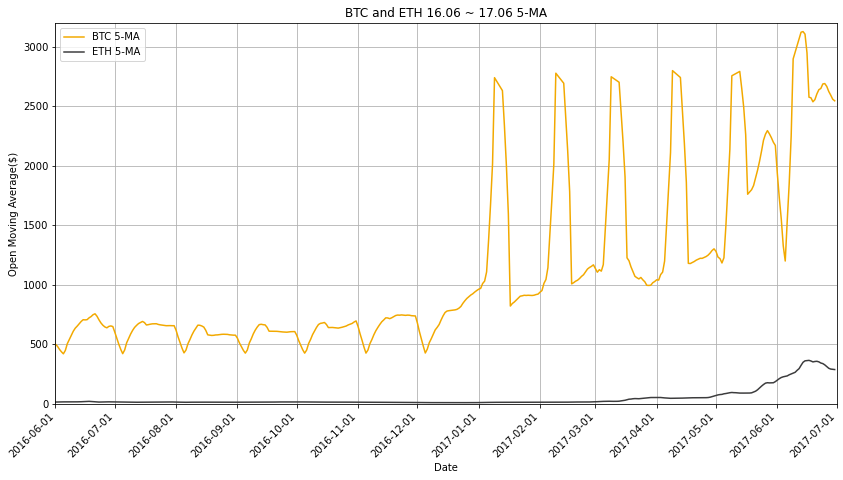

In [196]:
plt.figure(figsize=(14,7))

plt.plot(btc_1606_1706.index, btc_1606_1706['5MA'], color='#f2a900', label='BTC 5-MA')
plt.plot(eth_1606_1706.index, eth_1606_1706['5MA'], color='#3c3c3d', label='ETH 5-MA')

plt.grid(True)

plt.legend(loc='upper left')

plt.title('BTC and ETH 16.06 ~ 17.06 5-MA')

plt.xticks(pd.date_range(start='2016-06-01', periods=14, freq=pd.offsets.MonthBegin()), rotation=45, ha='right')

plt.axis([pd.Timestamp(year=2016, month=6, day=1),pd.Timestamp(year=2017, month=7, day=1), 0, 3200])

plt.xlabel('Date')
plt.ylabel('Open Moving Average($)')

plt.show()